## HomeWork_05 - Practice Text Mining 
(201723365 정회진)

## 8주차 실습 (BOW실습, 한글분류실습, 엔그램실습)

## 1. Back of Words 실습 진행

* "Text Feature" 추출은 기본적으로 단어 목록인 것을 분류자가 사용할 수 있는 피쳐 세트로 변환하는 과정입니다.
* NLTK 분류자는 받아 쓰기 스타일 피쳐 세트를 결과값으로 예상하기에, 사용자가 텍스트를 받아쓰기 형태로 변환해야합니다.
* 단어 모형은 가장 간단한 방법입니다. 한개의 Instrance의 모든 단어로부터 특징을 구분 짓습니다. 
* 이 방법은 단어의 순서, 또는 단어가 몇 번 나타나든지 개의치 않고, 해당 리스트에 그 단어 존재 여부에 달려있습니다.

In [1]:
def bag_of_words(words):
    return dict([(word, True) for word in words])

* 주어진 문서(word tokenize된 결과)에 대해 feature set을 dictionary 형태로 구성해서 반환합니다.
* 단어를 찾을때 안에 존재하면, True로 표시, 존재 하지 않는 단어는 표시하지 않습니다.

In [2]:
bag_of_words(['the', 'quick', 'brown', 'fox'])

{'the': True, 'quick': True, 'brown': True, 'fox': True}

* NLTK Corpus "https://www.nltk.org/book/ch02.html"


* movie_reviews
* NLTK Corpus 중 movie review 수집 데이터로, 감성분석 결과(pos, neg)가 label로 붙어 있습니다.
* Compiler: Pang, Lee
* Contents: 2k movie reviews with sentiment polarity classification

In [3]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [4]:
from nltk.corpus import movie_reviews

print('review count:', len(movie_reviews.fileids())) # 영화 리뷰 문서의 id를 반환
print(movie_reviews.fileids()[:10]) # id를 10개까지만 출력
print(movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류

print('"neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('"pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환
fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환

print('id:', fileid)
print(movie_reviews.raw(fileid)[:500]) #첫번째 문서의 내용을 500자까지만 출력
print(movie_reviews.sents(fileid)[:2]) #첫번째 문서를 sentence tokenize한 결과 중 앞 두 문장
print(movie_reviews.words(fileid)[:10]) #첫번째 문서를 word tokenize한 결과 중 앞 열 단어

review count: 2000
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
['neg', 'pos']
"neg" reviews: 1000
"pos" reviews: 1000
id: neg/cv000_29416.txt
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]
['

### Bag of words model을 이용한 feature 추출 첫번째 방법
* Label 별로 각 문서들에 대한 feature를 생성 - bag_of_words() 함수를 이용


* collections(https://docs.python.org/2/library/collections.html) - High-performance container datatypes - 를 이용하여 feature set을 저장. 
* 하나의 label(ex. 'neg')에 1,000개의 feature set을 할당해야 하므로 단순 dictionary가 아닌 container를 사용. 
* 각 feature는 dictionary로 이루어져 있음

In [5]:
import collections

#feature 추출을 위한 함수로, 앞서 정의한 bag_of_words()를 사용
def label_feats_from_corpus(corp, feature_detector=bag_of_words): 
    label_feats = collections.defaultdict(list) # container 초기화
    for label in corp.categories(): #''neg', 'pos' 각 label에 대해
        for fileid in corp.fileids(categories=[label]): #각 label에 해당하는 문서들에 대해
            feats = feature_detector(corp.words(fileids=[fileid])) #주어진 문서를 bag_of_words feature로 변환
            label_feats[label].append(feats) #container에 feature 추가
    return label_feats

lfeats = label_feats_from_corpus(movie_reviews)
print(lfeats.keys())

dict_keys(['neg', 'pos'])


In [6]:
len(lfeats['neg'])

1000

In [7]:
", ".join(lfeats['neg'][0])

'plot, :, two, teen, couples, go, to, a, church, party, ,, drink, and, then, drive, ., they, get, into, an, accident, one, of, the, guys, dies, but, his, girlfriend, continues, see, him, in, her, life, has, nightmares, what, \', s, deal, ?, watch, movie, ", sorta, find, out, critique, mind, -, fuck, for, generation, that, touches, on, very, cool, idea, presents, it, bad, package, which, is, makes, this, review, even, harder, write, since, i, generally, applaud, films, attempt, break, mold, mess, with, your, head, such, (, lost, highway, &, memento, ), there, are, good, ways, making, all, types, these, folks, just, didn, t, snag, correctly, seem, have, taken, pretty, neat, concept, executed, terribly, so, problems, well, its, main, problem, simply, too, jumbled, starts, off, normal, downshifts, fantasy, world, you, as, audience, member, no, going, dreams, characters, coming, back, from, dead, others, who, look, like, strange, apparitions, disappearances, looooot, chase, scenes, tons, we

In [8]:
lfeats['neg'][0]

{'plot': True,
 ':': True,
 'two': True,
 'teen': True,
 'couples': True,
 'go': True,
 'to': True,
 'a': True,
 'church': True,
 'party': True,
 ',': True,
 'drink': True,
 'and': True,
 'then': True,
 'drive': True,
 '.': True,
 'they': True,
 'get': True,
 'into': True,
 'an': True,
 'accident': True,
 'one': True,
 'of': True,
 'the': True,
 'guys': True,
 'dies': True,
 'but': True,
 'his': True,
 'girlfriend': True,
 'continues': True,
 'see': True,
 'him': True,
 'in': True,
 'her': True,
 'life': True,
 'has': True,
 'nightmares': True,
 'what': True,
 "'": True,
 's': True,
 'deal': True,
 '?': True,
 'watch': True,
 'movie': True,
 '"': True,
 'sorta': True,
 'find': True,
 'out': True,
 'critique': True,
 'mind': True,
 '-': True,
 'fuck': True,
 'for': True,
 'generation': True,
 'that': True,
 'touches': True,
 'on': True,
 'very': True,
 'cool': True,
 'idea': True,
 'presents': True,
 'it': True,
 'bad': True,
 'package': True,
 'which': True,
 'is': True,
 'makes': True

## Bag of words model을 이용한 feature 추출 두번째 방법

* 각 문서를 먼저 word list와 label의 list로 변환
* feature 추출 대상이 되는 단어 집합 구성 - 이 때 전체 words들에 대한 frequency data를 이용해 상위 n개의 단어만으로 feature 구성이 가능
* 각 문서에 대해 feature 추출 대상 단어들을 대상으로 해당 단어가 문서에 있는 지의 여부를 dictionary로 생성
* 생성된 feature와 label로 문서들에 대한 feature set을 구성

In [9]:
from nltk.corpus import movie_reviews
import random

In [10]:
# category 별로 fileid를 추출하고, 해당 fileid에 대해 문서의 word tokenize된 결과를 가져와서 
# documents 집합을 구성
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [11]:
#nltk FreqDist 함수를 이용하여 단어별로 빈도 수를 계산
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

In [12]:
for word in list(all_words)[:10]:
    print(word, all_words[word])

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822


In [13]:
sorted_features = sorted(all_words, key=all_words.get, reverse=True)
for word in sorted_features[:10]:
    print(word, all_words[word])
print(sorted_features[:10])

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822
[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in']


In [14]:
word_features = sorted_features[:2000] #빈도가 높은 상위 2000개의 단어만 추출하여 features를 구성

print(word_features[:100])

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [15]:
#주어진 document를 feature로 변환하는 함수, word_features를 사용
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in document_words) #2000개의 단어에 대해 True, False로 입력
    return features

In [16]:
#위에서 만든 documents 집합에 대해 feature set을 생성
featuresets = [(document_features(d, word_features), c) for (d,c) in documents]

In [17]:
print(len(featuresets[0][0])) #첫째 feature set의 첫째 element 즉 bag_of_words feature의 수 - 상위 2000개 단어
print(featuresets[0][1]) #첫째 feature set의 둘째 element 즉 label
print(featuresets[0][0]) # 첫째 feature set의 내용

2000
neg
{',': True, 'the': True, '.': True, 'a': True, 'and': True, 'of': True, 'to': True, "'": True, 'is': True, 'in': True, 's': True, '"': True, 'it': True, 'that': True, '-': True, ')': True, '(': True, 'as': True, 'with': True, 'for': True, 'his': True, 'this': True, 'film': True, 'i': True, 'he': True, 'but': True, 'on': True, 'are': True, 't': True, 'by': True, 'be': True, 'one': True, 'movie': True, 'an': True, 'who': True, 'not': True, 'you': True, 'from': True, 'at': True, 'was': True, 'have': True, 'they': True, 'has': True, 'her': True, 'all': True, '?': True, 'there': True, 'like': True, 'so': True, 'out': True, 'about': True, 'up': True, 'more': True, 'what': False, 'when': True, 'which': True, 'or': True, 'she': False, 'their': True, ':': True, 'some': True, 'just': False, 'can': True, 'if': True, 'we': True, 'him': True, 'into': False, 'even': False, 'only': True, 'than': True, 'no': True, 'good': True, 'time': True, 'most': True, 'its': False, 'will': False, 'story':

## BOW feature set을 이용한 분류

* NLTK Naive Bayes 분류기를 사용 http://www.nltk.org/howto/classify.html
* 주어진 문서의 label이 'neg'인지, 'pos'인지를 판단하는 분류기를 학습

In [18]:
train_set, test_set = featuresets[100:], featuresets[:100] #train set과 test set으로 분리

classifier = nltk.NaiveBayesClassifier.train(train_set) # train set으로 학습
print(nltk.classify.accuracy(classifier, test_set)) # test set으로 분류기 성능을 평가
classifier.show_most_informative_features(5) #분류기에서 가장 중요한 영향을 미치는 단어 상위 5개

0.82
Most Informative Features
             outstanding = True              pos : neg    =     10.2 : 1.0
                  seagal = True              neg : pos    =      8.3 : 1.0
                   mulan = True              pos : neg    =      7.6 : 1.0
             wonderfully = True              pos : neg    =      6.9 : 1.0
                    lame = True              neg : pos    =      5.7 : 1.0


In [19]:
testfeat = bag_of_words(['the', 'actor', 'was', 'seagal']) 
print(classifier.classify(testfeat))
testfeat = bag_of_words(['the', 'story', 'was', 'outstanding'])
print(classifier.classify(testfeat))
negfeat = bag_of_words(['the', 'plot', 'was', 'ludicrous']) # 터무니없는
print(classifier.classify(negfeat))
posfeat = bag_of_words(['kate', 'winslet', 'is', 'accessible']) # 이해가 돼!
print(classifier.classify(posfeat))

neg
pos
neg
pos


* Count Vector with Scikit

In [20]:
# data 준비, 입력이 raw text임
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
cv = CountVectorizer(vocabulary=word_features) #빈도수 상위 2,000개의 단어만 사용하여 count vector 객체를 생성
print(cv) #객체 parameter들을 확인

CountVectorizer(vocabulary=[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is',
                            'in', 's', '"', 'it', 'that', '-', ')', '(', 'as',
                            'with', 'for', 'his', 'this', 'film', 'i', 'he',
                            'but', 'on', 'are', 't', 'by', ...])


In [22]:
print('reviews count:', len(reviews))

reviews count: 2000


In [23]:
X = cv.fit_transform(reviews) #review를 이용하여 count vector를 학습하고, 변환
print(cv.get_feature_names()[:100]) # count vector에 사용된 feature 이름을 반환

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [24]:
print(X[0].toarray()[0, :100]) #변환된 결과의 첫째 feature set 중에서 앞 100개를 출력
print(max(X[0].toarray()[0])) #변환된 결과의 첫째 feature set 중에서 max 값

[ 0 38  0  0 20 16 16  0 12  8  0  0 25 13  0  0  0  1  5  4  1 10  6  0
  1 10  4 13  0  2  1  3  6  3  3  3  3  4  0  0  2  5  3  4  6  0 10  3
  3  3  2  2  2  4  1  4  2  0  0  0  0  4  0  0  4  1  5  3  1  0  1  2
  0  4  4  0  0  1  2  0  2  1  3  0  2  2  1  0  2  1  0  0  0  2  2  0
  3  2  5  1]
38


In [25]:
for word, count in zip(cv.get_feature_names()[:20], X[0].toarray()[0, :20]):
    print(word, ':', count)

, : 0
the : 38
. : 0
a : 0
and : 20
of : 16
to : 16
' : 0
is : 12
in : 8
s : 0
" : 0
it : 25
that : 13
- : 0
) : 0
( : 0
as : 1
with : 5
for : 4


### 두개 이상의 문서 사이에서, 유사도 계산 및 가장 유사한 문서 검색

* Cosine similarity (코사인 분석)
* 각도의 코사인을 측정하는 내부 제품 공간의 0이 아닌 두 벡터 사이의 유사성 측도

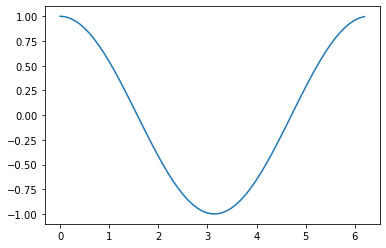

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,2*np.pi,0.1)   # start,stop,step
y = np.cos(x)
#print(x)
plt.plot(x, y)
plt.show()

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

new_review = "first of all it's a plot heavy mess that has bad voice talents , badly written script and fantastic animation. they are small pokemon with a powerful punch and have great psychic abilities"
new_vec = cv.transform([new_review]) #문서를 count vector로 변환

sim_result = cosine_similarity(new_vec, X) #변환된 count vector와 기존 값들과의 similarity 계산

In [28]:
# https://docs.python.org/3/howto/sorting.html
print(sorted(sim_result[0], reverse=True)[:10])

[0.47404152357849716, 0.4354705693078365, 0.4179484687443539, 0.40669013197195214, 0.4042441311205991, 0.4031257527594671, 0.39316730570210306, 0.38744458895341755, 0.3852303002224743, 0.384468719848977]


In [29]:
import numpy as np
np.argmax(sim_result[0])

679

In [30]:
print(reviews[679])

 " pokemon 3 : the movie " has a lot of bad things in it . 
first of all it's a plot heavy mess that has bad voice talents , badly written script and fantastic animation . 
the first film came out the end of 1999 and was a huge hit grossing almost $90 million domestically . 
a sequel soon followed and even made $45 million . 
warner has released their third movie based on the immensely popular video game and tv series and its a waste of time and celluloid . 
this time ash ketchum and his friends are on their way to the johto battles ( which my little brother told me the new spinoff is " pokemon : the johto journeys " so go figure ) anyway he comes in contact with a young girl who's father has disappeared after trying to discover the unown . 
they are small pokemon with a powerful punch and have great psychic abilities . 
the unown bring together their psychic abilities and create entei a powerful legendary pokemon who barriers young molly's house and creates every wish she wants . 
now

In [31]:
(-sim_result[0]).argsort()[:10]

array([ 679,  176, 1152, 1575,  952,  470,  688, 1144,  103,  159],
      dtype=int64)

### TFIDF with Scikit
* "http://scikit-learn.org/stable/modules/feature_extraction.html"
* "text-feature-extractionalt textalt text"
* 기존에 만든 count vector로부터 TFIDF vector로 변환
* Count vector를 거치지 않고 처음부터 TFIDF vector를 생성하는 것도 가능

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=True)
transformer

TfidfTransformer()

In [33]:
X_tfidf = transformer.fit_transform(X)
print(X_tfidf.shape)
print('max count score of the first vector:', max(X[0].toarray()[0]))
print('max tfidf score of the first vector:', max(X_tfidf[0].toarray()[0]))

(2000, 2000)
max count score of the first vector: 38
max tfidf score of the first vector: 0.3958279594831942


In [34]:
new_tfidf = transformer.transform(new_vec)
sim_result_tf = cosine_similarity(new_tfidf, X_tfidf)
np.argmax(sim_result_tf[0])

679

In [35]:
print(sorted(sim_result_tf[0], reverse=True)[:10])

[0.39386919931415737, 0.2158533727955655, 0.2055888622850777, 0.18940610744482467, 0.18862790397285573, 0.18841943811025338, 0.18329868368380425, 0.1810784645715442, 0.17853711709135542, 0.17620991687411133]


In [36]:
#count vector에 대한 유사도 상위 문서와 tfidf에 대한 유사도 상위 문서를 비교
print('Count vector:', (-sim_result[0]).argsort()[:10])
print('TFIDF vector:', (-sim_result_tf[0]).argsort()[:10])

Count vector: [ 679  176 1152 1575  952  470  688 1144  103  159]
TFIDF vector: [ 679  577 1209 1933  672 1280    3  913 1596 1163]


### Jaccard Similarity
* Jaccard 지수는 샘플 세트의 유사성과 다양성을 측정하는 데 사용되는 통계 방식
* Jaccard 계수는 유한 표본 집합 간의 유사성을 측정하며, 교차점의 크기를 표본 집합의 조합 크기로 나눈 값으로 정의된다.

from sklearn.metrics import 'jaccard_similarity_score'
tfidf_list = [679, 1280,  577, 1933, 1209, 1115, 1274, 913, 1456, 1796]
for i in tfidf_list:
    print(jaccard_similarity_score(new_vec.toarray()[0], X[i].toarray()[0]))

In [39]:
print(new_vec.toarray())

[[0 0 0 ... 0 0 0]]


In [40]:
### Dimension을 줄이는 방법: SVD
* lasso가 feature selection이라면, SVD는 feature extraction


* Feature selection (https://en.wikipedia.org/wiki/Feature_selection)


* In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for four reasons:

    
* simplification of models to make them easier to interpret by researchers/users,
* shorter training times,
* to avoid the curse of dimensionality,
* enhanced generalization by reducing overfitting (formally, reduction of variance)
* Text mining에서는 단어의 수를 다양한 방법으로 줄일 수 있음


* 전처리 과정에서 의미 없는 단어 삭제
* stopwords 삭제
* 빈도가 낮은 단어 삭제
* 빈도가 높은 단어 삭제
* 결과에 영향을 미치지 않는 단어 삭제
* Feature extraction: (https://en.wikipedia.org/wiki/Feature_extraction)

* In machine learning, pattern recognition and in image processing, feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction.

* PCA(Principal component analysis)
* LSA(Latent semantic analysis)
*SVD(Singular-value decomposition)

SyntaxError: invalid syntax (<ipython-input-40-c13b9645bdc5>, line 2)

## 2. 한글 문서의 분류
* 포탈사이트 다음에서 추출한 (http://movie.daum.net) 크롤링한 영화 리뷰를 이용한 분류 연습
* 영화 리뷰와 영화의 제목을 학습해서 주어진 리뷰 내용으로 어떤 영화에 대한 리뷰 인지를 예측


* data file 내용
* '신과함께', '코코', '라라랜드', '인피니티 워', '곤지암' 다섯개의 영화에 대해 총 1827개의 리뷰를 수집 csv 파일 안에 리뷰 내용, 평점, 영화 이름 의 순으로 저장

In [41]:
import csv

text = []
y = []
with open('movie_data.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        #print(row)
        if row: #그 줄에 내용이 있는 경우에만
            text.append(row[0]) #영화 리뷰를 text 리스트에 추가
            y.append(row[2]) #영화이름을 text 리스트에 추가

In [42]:
print('Num of samples: {}'.format(len(text)))
print('Movie titles of reivews: {}'.format(set(y)))

Num of samples: 1827
Movie titles of reivews: {'라라랜드', '신과함께', '곤지암', '코코', '인피니티 워'}


In [43]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(text, y, random_state=0)
# 비율을 지정하지 않으면 75:25로 분할됨

In [44]:
len(X_train) #1827의 0.75

1370

In [45]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
#from konlpy.tag import Twitter #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()
#twitter_tag = Twitter()

In [46]:
print(twitter_tag.morphs(X_train[1])) #둘째 리뷰에 대해 형태소 단위로 tokenize

['혹시', '나', '하고', '봤는데', '역시', '나다', ';;', '편집', '과', '사운드', '로', '주는', '작은', '공포', '영화', "'", '푸시', "'", '에서', '인상', '깊게', '봤던걸', '여기', '서', '또', '보네', ';;']


In [47]:
twitter_tag.nouns(X_train[1]) #둘째 리뷰에서 명사만 추출

['혹시', '역시', '편집', '사운드', '공포', '영화', '푸시', '인상', '여기', '또']

In [48]:
def twit_tokenizer(text): # Twitter 형태소 분석기의 명사추출함수를 tokenizer 함수로 사용
    return twitter_tag.nouns(text)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=3, max_df=0.90, max_features=1000, use_idf=True, sublinear_tf=True)
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=2) #Twitter 형태소분석기에서 명사만 추출하는 함수를 tokenizer로 이용
# twit_tokenizer 대신 twitter_tag.nouns를 직접 써도 됨
# 하나의 문서에서만 출현한 단어는 쓸모가 없으므로 제외, 즉 최소 document frequency를 2로 설정

X_train_tfidf = tfidf.fit_transform(X_train) # train data 변환 -> tfidf vector
X_test_tfidf = tfidf.transform(X_test) # test data 변환 -> tfidf vector

clf = LogisticRegression() # logistic regression 분류기 선언
clf.fit(X_train_tfidf, y_train) # 분류기 학습
print('Train score', clf.score(X_train_tfidf, y_train)) # train data 예측정확도
print('Test score', clf.score(X_test_tfidf, y_test)) # test data 예측정확도
print(X_train_tfidf.shape) # 총 1156개의 명사로 이루어짐

Train score 0.8364963503649635
Test score 0.6717724288840262
(1370, 1156)


In [50]:
X_test[:10] #test data에서 앞 10개를 출력

['졸잼 최고',
 '내용, 음악 , 연기력  무엇하나 빠지는것이 없네요 특히 음악은 계속 찾아 듣게되요^^',
 '아맥2D로 느즈막히 관람.... 히어로가 많이나오지만, 이걸 꽤나 잘 버무려놓음. 뻔한스토리의 틀을 벗어나려 노력한점은 높은점수를 줄만함.... 블럭버스터액션, 영상미는 말이필요없음...... 후속편 기대됨!',
 '후반부터 쫄렸다.',
 '진짜. 솔직히 한국 공포영화중에 이렇게 소재별로인건 정말 오랜만인듯; 지들끼리 소리지르고 정신없이 우왕자왕 심지어 무섭지도않어 효과음만크고 진짜최악임ㅉㅉ',
 '소문난 잔치에 먹을거 없음..ㅜㅜ',
 'good!',
 '아 점수를 줄 수가 없네  화면은 왜그리도 흔들어 데는지........ 재미도 없고 가볍기만하고 .... 최악의 재미없는 배멀미 영화',
 '영화 보면서 펑펑물었네요~ 부모님 사랑에 대해 다시한번 생각하게 했던 영화네요^ ^',
 '슬픈 스토리지만 삶을 돌아보게 하는 영화다. 죄를 지은자는 그 벌을 고스란히 받으리라. 사회 각종범죄자들 뉘우치길 바란다.']

In [51]:
clf.predict(X_test_tfidf[:10]) # test data의 앞 10개에 대한 예측내용

array(['인피니티 워', '라라랜드', '인피니티 워', '곤지암', '곤지암', '인피니티 워', '인피니티 워',
       '신과함께', '코코', '신과함께'], dtype='<U6')

In [52]:
print(y_test[:10]) # test data 앞 10개의 실제 영화제목

['인피니티 워', '라라랜드', '인피니티 워', '곤지암', '곤지암', '인피니티 워', '인피니티 워', '곤지암', '신과함께', '신과함께']


### 성능 개선을 위한 방법

In [53]:
# morphs()는 명사 외에도 모든 형태소를 포함
print(twitter_tag.morphs(X_train[1]))

['혹시', '나', '하고', '봤는데', '역시', '나다', ';;', '편집', '과', '사운드', '로', '주는', '작은', '공포', '영화', "'", '푸시', "'", '에서', '인상', '깊게', '봤던걸', '여기', '서', '또', '보네', ';;']


In [54]:
tfidf = TfidfVectorizer(tokenizer=twitter_tag.morphs, min_df=2) # 명사 대신 모든 형태소를 사용
#tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=3, max_df=0.90, max_features=1000, use_idf=True, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)
print('Train score', clf.score(X_train_tfidf, y_train))
print('Test score', clf.score(X_test_tfidf, y_test))
print(X_train_tfidf.shape)
#명사만 사용한 것에 비해 train score는 상승, test score는 하락

Train score 0.8963503649635036
Test score 0.649890590809628
(1370, 2260)


In [55]:
print(twitter_tag.pos(X_train[1], norm=True, stem=True)) #pos()는 형태소와 품사를 함께 제공

[('혹시', 'Noun'), ('나', 'Josa'), ('하다', 'Verb'), ('보다', 'Verb'), ('역시', 'Noun'), ('나다', 'Verb'), (';;', 'Punctuation'), ('편집', 'Noun'), ('과', 'Josa'), ('사운드', 'Noun'), ('로', 'Josa'), ('주다', 'Verb'), ('작다', 'Adjective'), ('공포', 'Noun'), ('영화', 'Noun'), ("'", 'Punctuation'), ('푸시', 'Noun'), ("'", 'Punctuation'), ('에서', 'Josa'), ('인상', 'Noun'), ('깊다', 'Adjective'), ('보다', 'Verb'), ('여기', 'Noun'), ('서', 'Josa'), ('또', 'Noun'), ('보다', 'Verb'), (';;', 'Punctuation')]


In [56]:
def twit_tokenizer2(text): #전체를 다 사용하는 대신, 명사, 동사, 형용사를 사용
    target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in twitter_tag.pos(text, norm=True, stem=True):
        if tag in target_tags:
            result.append(word)
#            result.append('/'.join([word, tag]))
    return result

In [57]:
print(twit_tokenizer2(X_train[1])) # 사용 예

['혹시', '하다', '보다', '역시', '나다', '편집', '사운드', '주다', '작다', '공포', '영화', '푸시', '인상', '깊다', '보다', '여기', '또', '보다']


In [58]:
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer2, min_df=2) #명사, 동사, 형용사를 이용하여 tfidf 생성
#tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=3, max_df=0.90, max_features=1000, use_idf=True, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)
print('Train score', clf.score(X_train_tfidf, y_train))
print('Test score', clf.score(X_test_tfidf, y_test))
print(X_train_tfidf.shape)
# 현재까지 중에서 test score가 가장 뛰어남

Train score 0.8715328467153285
Test score 0.6849015317286652
(1370, 1584)


In [59]:
# 모든 형태소를 다 사용하고 품사를 알 수 있도록 하면?
def twit_tokenizer3(text):
    #target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in twitter_tag.pos(text, norm=True, stem=True):
        result.append('/'.join([word, tag])) #단어의 품사를 구분할 수 있도록 함
    return result

In [60]:
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer3, min_df=2)
#tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=3, max_df=0.90, max_features=1000, use_idf=True, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)
print('Train score', clf.score(X_train_tfidf, y_train))
print('Test score', clf.score(X_test_tfidf, y_test))
print(X_train_tfidf.shape)
#성능이 오히려 떨어지고 품사 표시 없이 전체를 다 사용한 경우에 비해 train은 떨어지고, test는 올라감

Train score 0.8927007299270073
Test score 0.6739606126914661
(1370, 2023)


In [61]:
# train score가 높으므로 ridge를 쓰면 어떨까?
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier(alpha = 1)
ridge_clf.fit(X_train_tfidf, y_train)
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))
# train score가 올라가는 현상이 벌어짐
# test score가 올라갔으나 명사, 형용사, 동사를 쓴 것보다 떨어짐

Train set score: 0.944
Test set score: 0.676


In [62]:
#lasso를 쓰면?
from sklearn.linear_model import LogisticRegression
import numpy as np
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear')
lasso_clf.fit(X_train_tfidf, y_train)
print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))
print('Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1])

Train set score: 0.718
Test set score: 0.643
Used features count: 240 out of 2023


In [63]:
#lsa를 쓰면?
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=239, n_iter=7, random_state=42) #압축할 component의 수 지정
svd.fit(X_train_tfidf)  
print(svd.explained_variance_ratio_)  #계산된 각 component가 설명하는 분산의 비율
print(svd.explained_variance_ratio_.sum())  #선택된 component들이 설명하는 분산의 합 -> 선택한 component의 수에 따라 달라짐
print(svd.singular_values_) 
print(svd.components_.shape)

[0.01102934 0.01405529 0.01144551 0.0110093  0.00918016 0.00876149
 0.00836851 0.00795922 0.00777003 0.00737423 0.00707199 0.00665546
 0.00659729 0.00616382 0.00588976 0.00563969 0.00546929 0.00543044
 0.00524396 0.00523751 0.0051354  0.00507564 0.00494917 0.00478661
 0.00466253 0.0046021  0.00455272 0.00452943 0.00432636 0.0043043
 0.00425346 0.00416261 0.00410043 0.00401296 0.00399825 0.00396182
 0.00392779 0.00385998 0.00373325 0.00369469 0.00365484 0.00363113
 0.00357832 0.00354544 0.00349848 0.00346928 0.00337552 0.00334918
 0.00332458 0.00330956 0.00323571 0.00321667 0.00315217 0.00314053
 0.00309441 0.00307477 0.0030649  0.00301359 0.00300256 0.00296081
 0.00293836 0.00291433 0.00288938 0.00288701 0.00286437 0.00281526
 0.00280011 0.00276482 0.00274032 0.00271676 0.00269105 0.00266254
 0.00264105 0.00262961 0.00260318 0.00258836 0.00257263 0.0025549
 0.00253862 0.00252722 0.00251281 0.00248844 0.00248194 0.00245121
 0.00244755 0.00241116 0.00239864 0.0023803  0.00236743 0.002359

In [64]:
X_train_svd = svd.transform(X_train_tfidf) #선택된 component를 이용하여 2,000개의 feature로부터 feature extract (dimension reduce)
X_test_svd = svd.transform(X_test_tfidf)

from sklearn.linear_model import LogisticRegression
SVD_clf = LogisticRegression()
SVD_clf.fit(X_train_svd, y_train)
print('Train set score: {:.3f}'.format(SVD_clf.score(X_train_svd, y_train)))
print('Test set score: {:.3f}'.format(SVD_clf.score(X_test_svd, y_test)))

Train set score: 0.771
Test set score: 0.654


In [65]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=twit_tokenizer2, min_df=2).fit(X_train) #tfidf와 동일하게 max_feature를 제한하여 학습
X_train_cv = cv.transform(X_train) # train set을 변환
print('Train set dimension:', X_train_cv.shape) # 36310 대신 2000이 된 것을 확인
X_test_cv = cv.transform(X_test) # test set을 변환
print('Test set dimension:', X_test_cv.shape)

from sklearn.naive_bayes import MultinomialNB
NB_clf = MultinomialNB()
NB_clf.fit(X_train_cv, y_train)
print('Train set score: {:.3f}'.format(NB_clf.score(X_train_cv, y_train)))
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_cv, y_test)))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Train set dimension: (1370, 1584)
Test set dimension: (457, 1584)
Train set score: 0.801
Test set score: 0.685


## 3. 20 Newsgroups data 준비

* 20개 Newsgroup 데이터 집합의 내용은 교육을 위한 주제와 시험을 위한 주제 등 두 하위 집합으로 나뉜 20개 주제에 대해 약 18,000개의 뉴스그룹 게시물로 구성합니다.

In [66]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train',
#메일 내용에서 hint가 되는 부분을 삭제 - 순수하게 내용만으로
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

newsgroups_test = fetch_20newsgroups(subset='test', 
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

In [67]:
print('train set size:', len(newsgroups_train.data))
print('test set size:', len(newsgroups_test.data))
print('selected categories:', newsgroups_train.target_names)
print('train labels:', set(newsgroups_train.target))

train set size: 2034
test set size: 1353
selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
train labels: {0, 1, 2, 3}


In [68]:
print('##Train set text samples:', newsgroups_train.data[0])
print('##Train set label smaples:', newsgroups_train.target[0])
print('##Test set text samples:', newsgroups_test.data[0])
print('##Test set label smaples:', newsgroups_test.target[0])

##Train set text samples: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
##Train set label smaples: 1
##Test set text samples: TRry the SKywatch project in  Arizona.
##Test set label smaples: 2


In [69]:
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [70]:
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}", 
                        decode_error ='ignore', 
                        lowercase=True, 
                        stop_words = stopwords.words('english'), 
                        max_df=0.5,
                        min_df=2).fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)

(2034, 11483)


In [72]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression() #분류기 선언
clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

Train set score: 0.966
Test set score: 0.761


##  3.1 Bigram

In [73]:
tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}", 
                        decode_error ='ignore', 
                        lowercase=True, 
                        stop_words = stopwords.words('english'),
                        ngram_range=(1, 2),
                        max_df=0.5,
                        min_df=2).fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)

(2034, 26550)


In [74]:
bigram_features = [f for f in tfidf.get_feature_names() if len(f.split()) > 1]
print(bigram_features[:10])

["'cause can't", "'em better", "'expected errors'", "'karla' next", "'nodis' password", "'official doctrine", "'ok see", "'sci astro'", "'what's moonbase", 'aas american']


In [75]:
clf = LogisticRegression() #분류기 선언
clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

Train set score: 0.969
Test set score: 0.756


## 3.2 Tigram

In [76]:
tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}", 
                        decode_error ='ignore', 
                        lowercase=True, 
                        stop_words = stopwords.words('english'),
                        ngram_range=(1, 3),
                        max_df=0.5,
                        min_df=2).fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)

(2034, 32943)


In [77]:
trigram_features = [f for f in tfidf.get_feature_names() if len(f.split()) > 2]
print(trigram_features[:10])

["'em better shots", "'expected errors' basically", "'karla' next one", "'nodis' password also", "'official doctrine think", "'ok see warning", "'what's moonbase good", 'aas american astronautical', 'ability means infallible', 'able accept donations']


In [78]:
clf = LogisticRegression() #분류기 선언
clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

Train set score: 0.969
Test set score: 0.758


In [79]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train_tfidf, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

Train set score: 0.976
Test set score: 0.775


In [80]:
import numpy as np
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear') # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train_tfidf, y_train) # train data로 학습
print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))
print('Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1]) 

Train set score: 0.761
Test set score: 0.695
Used features count: 246 out of 32943


In [81]:
from sklearn.svm import SVC
clf = SVC(gamma='auto', kernel='linear')
clf.fit(X_train_tfidf, y_train) 
print('Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

Train set score: 0.974
Test set score: 0.758


## 9주차 실습(TopicModelKorean 실습, TopicTrendMovie 실습)

## 1. TopicModelKorean

### TopicModelKorean의 전재:
* 문서를 작성하는 저자들은 주제를 선정하고 그의따른 글을 써내려간다.
* 따라서 글에는 주제에 관련된 단어들이 많이 포함되어있다
* 여러번 중복된 단어들을 통계적으로 조합해서, 해당 글이 어떤 주제를 가지고 있는 글인지 파악할수있다.

In [82]:
import csv
text = []
y = []

with open('movie_data_new.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        #print(row)
        if row and len(row[0]) > 10: #review 길이가 10자 이상인 경우만
#        if row: #그 줄에 내용이 있는 경우에만
            text.append(row[0]) #영화 리뷰를 text 리스트에 추가
            y.append(row[2]) #영화이름을 text 리스트에 추가b

In [83]:
print('리뷰 수:', len(text))
print('리뷰영화:', set(y))

리뷰 수: 12445
리뷰영화: {'택시운전사', '라라랜드', '신과함께', '범죄도시', '곤지암', '코코', '인피니티 워'}


In [84]:
text[:50]

['헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...',
 '개연성은 무시해라 액션을 즐겨라 스타로드가 이끌어준다 각각의 영웅들을 즐겨라 그리고 단적인 신념이 얼마나 부질없는지 보셔라',
 '정말 지루할틈없이 넘잘만들었다 역시 대단하다',
 '마지막에 누구한테 연락한거지? 궁금',
 '다음 편이 궁굼해지네요^^',
 '안잼있는사람 있음???????????',
 '잘 만들었다! 지루할 틈이 없네...',
 '이제는 지겨워서 못보겠다',
 '롱턱 타노스의  장갑이 참 맘에 듬.  아이언 맨과 토르 닥터만 생고생하고..  가디언즈 오브 갤럭시 들 때문에  손해가 크다고 봄  들짐승 하고 칡뿌리 같은 캐릭이  재미를 더해줄줄 알았으나  아쉬움 . 분노의 상징 헐크가 겁을 먹다니..로키의 초반 출연뿐이 서운하지만  본 영화에 이어질 내용에 적합하지 않은지 서두에  죽는부분으로 마무리 됨은 심섬한 충격임 .  다음편에 헬라가 다시 나올까?',
 '와~~~~~진짜 개쪄는 인피니티워!!몇번을 봐도 개지린다.너무잼있다.어벤져스4도 너무 기대된다.빨리 2019년이왔으면 좋겠다.',
 '종합선물세트지만 가장 중요한 마무리가 없는 예고편!!!',
 '기대만큼 실망도크네요 임펙트도없고  내용도 그닥 너무억지',
 '이 영화를 보고나서 예전 영화 왓치맨이 생각나더군요 평화를 위해선 불특정 다수의 희생이 동반되어야 한다는 빌런들의 질서를 잡고자 하는 정의감이 영웅들의 여러 불특정 다수의 희생자를 만들고 이룬 질서와 뭐가 다를까란 의문을 던지는 영화였습니다',
 '괘 괜찮은 퀄리티의 수작',
 '충성충성 마블의 개돼지 인사올립니다',
 '너무허무하게끝나서다음편이있었으면조을거갔아요.',
 '액션씬 찍을때  카메라 좀 흔들어 대지말아라.정신없이 흔들어 댄다고 더 멋지게 나오냐??ㅜ연출이나 편집들이 전작들보다 많이 떨어진다.',
 '보다보면 "아니.. 얘네도 나와?" 하게 하는 완전 종합 선물 세트',
 '다양한 캐릭터들때문에 진짜 눈이 즐겁다는ㅋㅋ',
 '어벤져스 답게 쏟아붓긴 했는데 

In [85]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=twitter_tag.nouns, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(text)

In [86]:
review_cv.shape

(12445, 1000)

In [87]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [88]:
print('topic-word distribution dimension:', lda.components_.shape)
print('document-topic distribution dimenstion', review_topics.shape)

topic-word distribution dimension: (10, 1000)
document-topic distribution dimenstion (12445, 10)


In [89]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [90]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 사람, 보고, 내용, 원작, 편, 마블, 이해, 노스, 다음, 결말
Topic #1: 더, 말, 듯, 그, 사랑, 이야기, 것, 현실, 조금, 대한
Topic #2: 좀, 수, 볼, 것, 부분, 끝, 함, 눈, 느낌, 소재
Topic #3: 점, 정말, 꼭, 내, 때, 음악, 영화, 때문, 중, 신
Topic #4: 이, 정도, 왜, 신파, 그냥, 한국, 영화, 감독, 작품, 관객
Topic #5: 연기, 배우, 최고, 마동석, 윤계상, 액션, 송강호, 역시, 연기력, 조연
Topic #6: 스토리, 진짜, 감동, 눈물, 기대, 마지막, 재미, 또, 웹툰, 모두
Topic #7: 영화, 생각, 감동, 가족, 다시, 한번, 처음, 보기, 아이, 추천
Topic #8: 광주, 장면, 중간, 그, 역사, 우리, 가슴, 번, 분, 택시
Topic #9: 시간, 돈, 나, 평점, 거, 뭐, 공포영화, 공포, 별로, 애



In [91]:
twitter_tag.nouns(text[1])

['개연', '성은', '무시', '액션', '스타로드', '각각', '영웅', '적', '신념', '얼마나']

In [92]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [93]:
tokenizer(text[1])

['개연', '성은', '무시', '액션', '스타로드', '각각', '영웅', '신념', '얼마나']

In [94]:
#count vector 새로 생성
vec = CountVectorizer(tokenizer=tokenizer, decode_error ='ignore', 
                      max_df=0.5, max_features = 1000) #너무 자주 나타나는 단어는 제외
review_cv = vec.fit_transform(text)

In [95]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 50, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 느낌, 관객, 공포, 얘기, 영화, 갈수록, 상상, 노잼, 스트레스, 내년
Topic #1: 가족, 지옥, 대한, 설정, 저승, 부모님, 점수, 영화, 여자, 생각
Topic #2: 영화, 눈물, 이건, 진짜, 댓글, 시나리오, 억지로, 라라, 랜드, 인생
Topic #3: 연기, 차태현, 김동욱, 주지훈, 이후, 대해, 진짜, 김향기, 막판, 아저씨
Topic #4: 송강호, 택시, 계속, 가슴, 기자, 운전사, 정신, 해도, 영화, 한마디
Topic #5: 아이, 영화, 강철, 보고, 세상, 아주, 설명, 생각, 마음, 부모
Topic #6: 영화, 영화관, 가지, 인상, 유머, 또한, 한국, 도대체, 재즈, 편이
Topic #7: 기대, 귀신, 기분, 시대, 명작, 형사, 영화, 외국, 최고, 추석
Topic #8: 영화, 약간, 시작, 세계, 구성, 그것, 요즘, 정말, 눈물, 한번
Topic #9: 부분, 추천, 나름, 소리, 라면, 아주, 순간, 다큐, 보시, 이해
Topic #10: 신파, 억지, 엄마, 드라마, 눈물, 중국, 스케일, 영화, 주제, 스토리
Topic #11: 다시, 인간, 집중, 한번, 정도, 영웅, 영화, 시간, 추격, 시도
Topic #12: 원작, 연기력, 다른, 영화, 올해, 자신, 요소, 효과, 문제, 폭력
Topic #13: 마블, 노스, 결말, 어벤져스, 히어로, 다음, 이해, 시리즈, 이번, 토르
Topic #14: 역시, 영화, 생각, 박수, 정도, 충격, 이승, 기대, 꿀잼, 사후세계
Topic #15: 액션, 영화, 범죄, 도시, 최고, 취향, 마동석, 남한, 모두, 재미
Topic #16: 광주, 역사, 시민, 위해, 전두환, 민주화, 희생, 운동, 민주주의, 가슴
Topic #17: 영화, 상영, 처음, 정말, 가장, 나라, 반성, 각색, 관객수, 대안
Topic #18: 감독, 영화, 천만, 최악, 개연, 수준, 한국, 스크린, 뭔가, 헐리웃
Topic #19: 중간, 영화, 이제, 매우

In [96]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) #5개 클러스터로 분류
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (50, 1000)
Cluster label: [0 0 2 4 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2
 1 0 0 0 0 0 2 0 0 0 0 0 0]


In [97]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (50, 2)


array([  1.1661736 ,  -9.497523  ,  -7.298417  , -18.305029  ,
        -1.7897444 ,  -2.3477426 ,  -3.5354853 ,  -0.94421303,
        -7.860451  ,   2.2685328 ,  -2.8698354 , -16.151146  ,
       -14.281367  ,   6.702058  ,  -4.7428007 ,  -6.8632326 ,
         6.444475  ,  -6.8286176 ,  -3.6123948 , -13.128381  ,
        -4.915106  , -10.139614  ,   3.2663267 ,  -3.8281472 ,
         8.213682  ,  -5.418153  ,  -5.994055  ,  -7.386739  ,
       -10.033295  , -10.249946  , -13.328244  ,  -0.12076545,
        -3.6230445 ,  -0.09988046,  -1.1253673 ,   2.1043386 ,
        -7.1335683 ,   2.3505533 , -12.10842   , -10.129422  ,
        -7.375628  ,  -5.251662  , -14.851677  , -10.106404  ,
         0.85726947,   8.708954  ,  -1.935954  ,   2.8321633 ,
        -9.441119  ,  -4.639577  ], dtype=float32)

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

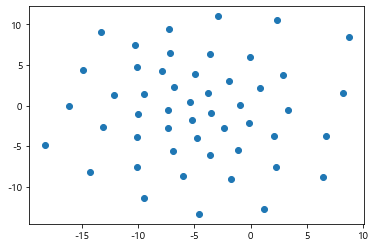

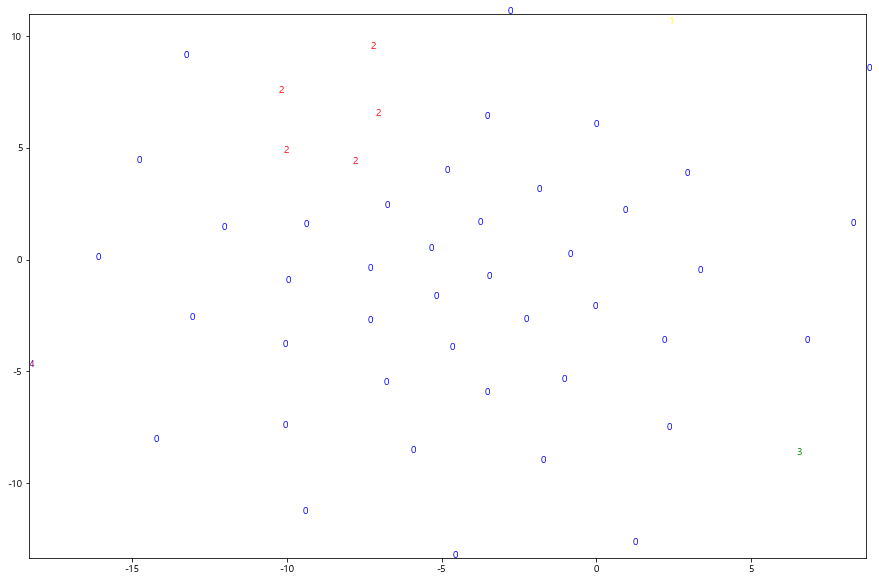

In [99]:
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

plt.figure(figsize=(15,10))
plt.xlim(min(x1), max(x1))
plt.ylim(min(x2), max(x2))
for i in range(len(x1)):
#    plt.text(X1_lsi[i], X2_lsi[i], sample_label[i],
#            color = colors[sample_label[i]])
    plt.text(x1[i], x2[i], kmeans.labels_[i],
            color = colors[kmeans.labels_[i]])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=30)
plt.show()

#아래 결과를 보면 각 topic들이 고르게 분포하고 있어, 클러스터링이 별로 의미 없음을 알 수 있음

In [101]:
lda.perplexity(review_cv)

584.5972328952549

In [102]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 25, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=2.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 영화, 느낌, 관객, 얘기, 사람, 곤지암, 감동, 갈수록, 시간, 영화관
Topic #1: 가족, 영화, 설정, 저승, 감동, 점수, 부모님, 생각, 여자, 사람
Topic #2: 영화, 눈물, 생각, 진짜, 시나리오, 이건, 스토리, 인정, 감동, 시작
Topic #3: 연기, 차태현, 하정우, 진짜, 김동욱, 눈물, 어머니, 주지훈, 영화, 신파
Topic #4: 영화, 계속, 기자, 그냥, 연기, 정신, 배우, 알바, 정말, 상황
Topic #5: 영화, 아이, 사랑, 강철, 무슨, 보고, 마음, 관람, 평가, 아주
Topic #6: 영화, 인상, 가지, 유머, 일단, 제대로, 도대체, 재즈, 한국, 기대
Topic #7: 공포, 영화, 연출, 귀신, 형사, 외국, 거의, 코드, 명작, 흥행
Topic #8: 영화, 세계, 약간, 사람, 정말, 쓰레기, 그것, 실감, 감동, 구성
Topic #9: 영화, 소리, 추천, 부분, 나름, 아들, 순간, 다큐, 연기자, 영화인
Topic #10: 영화, 그냥, 집중, 드라마, 중국, 눈물, 감동, 생각, 감성, 만화
Topic #11: 윤계상, 연기, 마동석, 인간, 영화, 조선족, 다시, 영웅, 배우, 역할
Topic #12: 영화, 원작, 연기력, 생각, 요소, 실제, 올해, 감동, 효과, 초딩
Topic #13: 마블, 노스, 어벤져스, 히어로, 캐릭터, 시리즈, 이해, 이번, 예고편, 영화
Topic #14: 영화, 디즈니, 생각, 눈물, 동안, 자체, 자극, 박수, 정도, 취향
Topic #15: 영화, 범죄, 도시, 감동, 실화, 배우, 캐스팅, 이후, 재미, 신파
Topic #16: 광주, 택시, 역사, 시민, 우리, 위해, 국민, 민주화, 전두환, 진실
Topic #17: 영화, 정말, 교훈, 연기, 반성, 나라, 배우, 스릴, 사람, 보고
Topic #18: 영화, 수준, 관객, 최악, 감독, 전체, 개연, 천만, 배우, 역대
Topic #19: 영화, 감동, 정말, 연기, 코

556.1433795532763

In [103]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 느낌, 공포영화, 한국, 별로, 관객, 공포, 전개, 정도, 초반, 영화관
Topic #1: 감동, 사람, 생각, 재미, 가족, 모두, 이야기, 보기, 대한, 지옥
Topic #2: 영화, 음악, 인생, 처음, 생각, 최악, 상영, 시작, 댓글, 간만
Topic #3: 연기, 배우, 진짜, 마동석, 윤계상, 신파, 장면, 눈물, 차태현, 액션
Topic #4: 정말, 그냥, 다시, 가슴, 택시, 몰입, 소재, 내내, 영화로, 알바
Topic #5: 보고, 내용, 눈물, 사랑, 마음, 수준, 현실, 기억, 아이, 한국영
Topic #6: 광주, 기대, 중간, 우리, 웹툰, 사실, 시민, 인간, 나름, 실망
Topic #7: 최고, 마지막, 평점, 감독, 역사, 송강호, 역시, 작품, 연출, 귀신
Topic #8: 스토리, 원작, 한번, 정도, 완전, 천만, 주인공, 지금, 가장, 약간
Topic #9: 시간, 마블, 하나, 이해, 부분, 추천, 노스, 다음, 결말, 영상



426.0687587296363

## 2. TopicTrendMovie

In [104]:
import matplotlib
%matplotlib inline
import pandas as pd

In [105]:
data = pd.read_csv("movie_data_include_date.csv", header=None, names=['review', 'rate', 'date', 'title']) #read data

In [106]:
for ix, name in enumerate(data.columns):
    print(ix,name)

0 review
1 rate
2 date
3 title


In [107]:
data.head()

,review,rate,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


In [108]:
data.review.shape
type(data.review)

pandas.core.series.Series

In [109]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=tokenizer, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(data.review)

In [111]:
review_cv.shape

(14725, 1000)

In [112]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [113]:
print(review_topics.shape)
type(review_topics)

(14725, 10)


numpy.ndarray

In [114]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [115]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 마지막, 기대, 스토리, 내용, 마블, 부분, 하나, 노스, 조금, 다음
Topic #1: 감동, 최고, 가족, 음악, 인생, 사랑, 마음, 영화, 현실, 우리나라
Topic #2: 연기, 배우, 재미, 감동, 송강호, 역시, 별로, 작품, 내내, 김동욱
Topic #3: 영화, 원작, 웹툰, 이야기, 대한, 다른, 모든, 주인공, 영화로, 아주
Topic #4: 시간, 그냥, 평점, 수준, 관객, 영화, 천만, 이상, 최악, 이건
Topic #5: 생각, 진짜, 눈물, 보고, 신파, 다시, 한번, 아이, 억지, 엄마
Topic #6: 장면, 스토리, 중간, 공포영화, 공포, 추천, 보기, 한국영, 대박, 소재
Topic #7: 영화, 사람, 정도, 감독, 한국, 완전, 이영화, 인간, 지옥, 판타지
Topic #8: 정말, 느낌, 처음, 액션, 차태현, 연출, 몰입, 연기력, 조연, 초반
Topic #9: 마동석, 광주, 윤계상, 역사, 가슴, 우리, 택시, 지금, 시민, 국민



In [116]:
trend_data = pd.DataFrame(review_topics, columns=['topic'+str(i) for i in range(1, 11)])

In [117]:
trend_data.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10
0,0.164942,0.083333,0.166584,0.083333,0.083333,0.083333,0.085058,0.083333,0.083333,0.083416
1,0.083333,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.083333,0.166667,0.083333
2,0.235404,0.063486,0.228448,0.058861,0.058824,0.058824,0.059877,0.058824,0.116614,0.060839
3,0.091236,0.090909,0.090909,0.090909,0.098985,0.091533,0.092461,0.165766,0.096382,0.090909
4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [118]:
trend_data = pd.concat([trend_data, data.date], axis=1)

In [119]:
trend_data.shape

(14725, 11)

In [120]:
trend_data.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,date
0,0.164942,0.083333,0.166584,0.083333,0.083333,0.083333,0.085058,0.083333,0.083333,0.083416,2018.10.29
1,0.083333,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.083333,0.166667,0.083333,2018.10.26
2,0.235404,0.063486,0.228448,0.058861,0.058824,0.058824,0.059877,0.058824,0.116614,0.060839,2018.10.24
3,0.091236,0.090909,0.090909,0.090909,0.098985,0.091533,0.092461,0.165766,0.096382,0.090909,2018.10.22
4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,2018.10.20


In [121]:
trend = trend_data.groupby(['date']).mean()

In [122]:
trend.shape

(640, 10)

In [123]:
trend.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10
date,,,,,,,,,,
2016.04.27,0.235311,0.059894,0.058933,0.107521,0.059964,0.118221,0.058978,0.065538,0.117948,0.117692
2016.05.09,0.097365,0.098607,0.083981,0.168794,0.084496,0.098933,0.073354,0.084023,0.133057,0.077390
2016.05.20,0.164126,0.062500,0.125222,0.188592,0.063200,0.124882,0.083440,0.062500,0.063038,0.062500
2016.06.04,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.250000,0.083333
2016.07.09,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [124]:
len(set(trend_data.date))

640

In [125]:
#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

import matplotlib.pyplot as plt

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

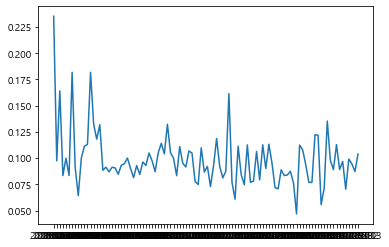

In [126]:
plt.plot(trend.index[:100], trend.topic1[:100])
plt.show()

##  3. 수업 외적으로 수집한 데이터를 이용한 텍스트 마이닝(웹 크롤링)

In [127]:
# Web크롤링 전 세팅 과정
import numpy as np
import pandas as pd

# 시각화 패키지
import matplotlib.pyplot as plt

from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

In [ ]:
search = "아주대학교"
title_list = []

In [ ]:
def crawler(start, end):
    while 1:
            
            if start > end:
                break
                
                url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}start={}'. format
                req = requests.get(url)
                
                html = req.text
                soup= BeautifulSoup(html, 'html.parser')
                
                titles=soup.select(
                            'ul.type01 > li > di > dt > a')
                
                for title in titles:
                    title_list.append(title['title'])
                    start += 10
                    
                    print(titles)

In [ ]:
crawler(1,50)

In [ ]:
from konlpy.tag import Twitter
twitter = Twitter()

In [ ]:
word_list = title_list

In [ ]:
sentences_tag = []

for sentence in word_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    
print(morph)

In [ ]:
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [ ]:
len(noun_list)
noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

In [ ]:
counts = Counter(noun_list)
tags = counts.most_common(30)
tags

In [ ]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/maigun.tff',
                                                 background_color='white',
                                                 width=800,
                                                 height=600)
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
pli.imshow(cloud)
plt.show()